<a href="https://colab.research.google.com/github/TokarevAlexandr/D-7.7/blob/main/%D0%A2%D0%BE%D0%BA%D0%B0%D1%80%D0%B5%D0%B2_%D0%A1%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B_%D0%98%D0%98_%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Сделайте копию** этого файла (Файл - Сохранить копию на диске), переименуйте её, добавив в название вашу фамилию. Например, Тюжина_Системы ИИ_агрегация данных.ipynb

Выполните все задания и отправьте результат (ссылку на файл) на проверку преподавателю.

**Введение в искусственный интеллект**
* Агрегация данных в Pandas: count, sum, max, min, mean, median.
* Методы groupby и aggregate.
* Объединение методов.  



Для дальнейшей работы загрузите файл StudentsPerformance.csv (доступен в ЭИОС) в текущий сеанс. Для этого воспользуйтесь панелью слева. Откройте раздел "файлы" (значок папки) и перетащите файл на появившуюся панель.
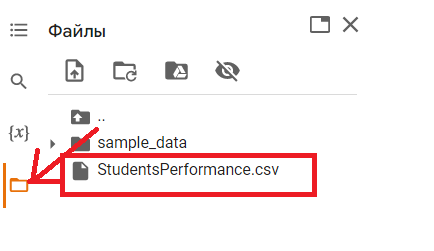

Исходный файл можно скачать по ссылке: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Считаем данные из файла с помощью команды read_scv.

In [ ]:
#импортируем библиотеку pandas под псевдонимом pd
import pandas as pd
#считываем данные из файла
sp = pd.read_csv("StudentsPerformance.csv")
#выведем полученный датафрейм на экран
sp


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


В полученном датафрейме информация о том, как студенты сдавали тесты по математике (math score), чтению (reading score) и письму (writing score)  в зависмости от этнической группы, уровня образования родителей, подготовительных крусов и т.д. Все столбцы названы довольно подробно, однако команда query не может работать со столбцами, названия которых содержат пробел, например parental level of education (уровень образования родителей). Что же делать? Можно переименовать такие столбцы с помощью метода [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).

In [ ]:
#переименовываем столбцы, содежащие пробел
#парметром функции rename является словарь, где  ключи - старые названия, а значения - новые названия столбцов.
sp = sp.rename(columns = {'parental level of education' : 'parental_level_of_education', 'test preparation course': 'test_preparation_course', 'math score' : 'math_score', 'reading score' : 'reading_score', 'writing score' : 'writing_score'}) #Переименовывание столбцов
#выводим верхушку переработанного набора
sp.head(n=10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


В Pandas можно не только выбирать определенные строки или столбцы, но и создавать новые столбцы данных на основании уже имеющихся. Для этого можно   воспользоваться привычными арифметическими операциями.




In [ ]:
#создание столбца sum_perfomance равного сумме баллов по математике, чтению и письму
sp["sum_performance"] = (sp["math_score"] + sp["reading_score"] + sp["writing_score"])
#выводим первые 5 строк массива данных
sp.head(n=5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


**Практика.** Создайте новый столбец  average_performance и посчитайте среднюю успеваемость, как среднее арифметическое успеваемости по математике, письму и чтению.

In [ ]:
#ниже разместите ваш код
sp['average_performance']= ((sp['math_score']+sp['reading_score']+sp['writing_score'])/3)
sp.head(n=12)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance,average_performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


#Агрегирование, группировка и сортировка

Функция агрегирования - это функция, которая принимает несколько отдельных значений и возвращает сводные данные, например сумму, среднее, или максимум по столбцу.

Функцией агрегирования могут выступать количество (count), сумма(sum), максимум (max), минимума (min), среднее (mean), медиана (median) и другие.

In [ ]:
#вывод минимального значения в каждом столбце
sp.min()

gender                                     female
race/ethnicity                            group A
parental_level_of_education    associate's degree
lunch                                free/reduced
test_preparation_course                 completed
math_score                                      0
reading_score                                  17
writing_score                                  10
sum_performance                                27
average_performance                           9.0
dtype: object

Обратите внимание, данные вывелись для всех значений, в том числе нечисловых. Как вы помните, строки в Python тоже можно сравнивать и меньшей будет та строка, которая по алфавиту идет раньше.

Агрегирование можно применять как ко всему датафрейму, так и к его части:

In [ ]:
#вывод медианного значения для успеваемости по чтению и математике
sp[["reading_score", "math_score"]].median()

reading_score    70.0
math_score       66.0
dtype: float64

Ограничение может касаться не только столбцов, но строк.

In [ ]:
#подсчет количества девушек (строк со значением 'female' в столбце 'gender')
sp[sp['gender']== 'female'].count()

gender                         518
race/ethnicity                 518
parental_level_of_education    518
lunch                          518
test_preparation_course        518
math_score                     518
reading_score                  518
writing_score                  518
sum_performance                518
average_performance            518
dtype: int64

Приведенный выше пример позволил определить сколько результатов девушек в представленном наборе - 518, однако вывод по каждому столбцу не очень удобен.

Чтобы сделать вывод более лаконичным, укажем один столбец, который хотим видеть, например 'gender'.

In [ ]:
sp[sp['gender']== 'female']['gender'].count()

518

**Практика.** Посчитайте среднее значение успеваемости по каждому из трех предметов для детей бакалавров (bachelor's degree). Для экранирования символа ' в сочетании bachelor's degree используйте знак - \ .

```
# "bachelor\'s degree".
```




In [ ]:
#разместите ниже ваш код
sp[sp['parental_level_of_education']=='bachelor\'s degree'][['math_score','reading_score','writing_score']].mean()

math_score       69.389831
reading_score    73.000000
writing_score    73.381356
dtype: float64

Метод [agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)  производит агрегирование с помощью одной или нескольких операций по указнной оси (0 или ‘index’,- агрегация по столбцам, 1 или ‘columns’ - агрегация по строкам, значение по умолчанию - 0).

Используя метода agg, мы можем получить разные данные для разных столбцов. Например, среднее для результатов по математике, и максимум для результатов по чтению. Столбцы и функции указываются как словарь.

In [ ]:
#среднее для результатов по математике, и максимум для результатов по чтению
sp.agg({'math_score' : 'mean', 'reading_score' : 'max'})

math_score        66.089
reading_score    100.000
dtype: float64

Мы можем посчитать несколько метрик по одному столбцу. В этом случае значением по ключу столбца будет список желаемых функций агрегирования.

In [ ]:
sp.agg({'math_score' : ['median','mean'], 'reading_score' : ['mean','count']})

,math_score,reading_score
median,66.000,NaN
mean,66.089,69.169
count,NaN,1000.000


**Практика.** Посчитайте минимальное и среднее значение по столбцам math_score и reading_score, а по сформирвоанному вами столбцу average_performance посчитайте сумму.

In [ ]:
#разместите ниже код
sp.agg({'math_score':['min','mean'],'reading_score':['min','mean'],'average_performance':['sum']})

,math_score,reading_score,average_performance
min,0.000,17.000,NaN
mean,66.089,69.169,NaN
sum,NaN,NaN,67770.666667


Очень часто данные в наборе необходимо сгруппировать. Метод
[groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) в комбинации с одной или несколькими функциями агрегирования позволяет обобщать данные.

Пример ниже позволяет оценить среднюю успеваемость по математике и чтению для девушек и юношей.

In [ ]:
#группируем данные по полю "пол" (gender) и выводим среднее по столбцам математика (math_score) и чтение (reading_score)
sp.groupby('gender').agg({'math_score' : 'mean', 'reading_score' : 'mean'})

,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


Уровней группировки может быть несколько, в этом случае они указываются последовательно. Так мы можем посчитать среднюю успеваемость девушек и юношей по уровню образования родителей.

*Обратите внимание, ячейка сработает без ошибок, только если вы верно  выполнили практическое задание 2.*

In [ ]:
sp.groupby(['parental_level_of_education', 'gender']).agg({'average_performance' : 'mean'})

average_performance
parental_level_of_education gender                     
associate's degree          female            71.123563
                            male              67.867925
bachelor's degree           female            74.671958
                            male              68.775758
high school                 female            64.748227
                            male              61.575163
master's degree             female            73.648148
                            male              73.521739
some college                female            71.002825
                            male              65.716049
some high school            female            65.564103
                            male              64.636364

Для сортировки массива по столбцу используется метод **sort_values**. В качестве параметра указывается название столбца, по которому производится сортировка.

In [ ]:
#сортировка массива по возрастанию столбца math_score
sp.sort_values('math_score')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance,average_performance
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
787,female,group B,some college,standard,none,19,38,32,89,29.666667
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
...,...,...,...,...,...,...,...,...,...,...
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
451,female,group E,some college,standard,none,100,92,97,289,96.333333
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


Для сортировки по нескольким столбца необходимо указать список этих столбцов. Параметр **ascending** отвечает за направление сортировки. True - по возрастанию (значение по умолчанию), False - по убыванию.

In [ ]:
#сортировка массива по убыванию столбцов math_score и reading_score
sp.sort_values(['math_score','reading_score'], ascending=False)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance,average_performance
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
...,...,...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
787,female,group B,some college,standard,none,19,38,32,89,29.666667
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333


**Практика.**
* Выведите количество юношей и девушек по уровню образования родителей.
* Выведите количество девушек по типу ланча.
* Выведите в процентах сколько студентов от общего количества студентов заказывают стандартный ланч на каждом уровне образования родителей. Отсортируйте результат по возрастанию.

In [ ]:
#выводим количество юношей и девушек по уровню образования родителей
sp.groupby(['parental_level_of_education','gender'])['gender'].count()

parental_level_of_education  gender
associate's degree           female    116
                             male      106
bachelor's degree            female     63
                             male       55
high school                  female     94
                             male      102
master's degree              female     36
                             male       23
some college                 female    118
                             male      108
some high school             female     91
                             male       88
Name: gender, dtype: int64

In [ ]:
#выводим количество девушек по типу ланча
sp[sp['gender']== 'female'].groupby(['lunch'])['lunch'].count()

lunch
free/reduced    189
standard        329
Name: lunch, dtype: int64

In [ ]:
#выводим в процентах сколько студентов от общего количества студентов заказывают стандартный ланч на каждом уровне образования родителей
max= sp[sp['lunch']== 'standard'].groupby(['parental_level_of_education']).count()/10
max

,gender,race/ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance,average_performance
parental_level_of_education,,,,,,,,,
associate's degree,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5
bachelor's degree,7.4,7.4,7.4,7.4,7.4,7.4,7.4,7.4,7.4
high school,12.6,12.6,12.6,12.6,12.6,12.6,12.6,12.6,12.6
master's degree,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
some college,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7
some high school,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8


In [ ]:
maksim=sp[sp['lunch']=='free/reduced'].groupby(['parental_level_of_education']).count()/10
maksim

,gender,race/ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance,average_performance
parental_level_of_education,,,,,,,,,
associate's degree,7.7,7.7,7.7,7.7,7.7,7.7,7.7,7.7,7.7
bachelor's degree,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4
high school,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
master's degree,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4
some college,7.9,7.9,7.9,7.9,7.9,7.9,7.9,7.9,7.9
some high school,6.1,6.1,6.1,6.1,6.1,6.1,6.1,6.1,6.1


In [ ]:
#отсортируем результат по возрастанию
max.sort_values(['lunch'],ascending=True)

,gender,race/ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score,sum_performance,average_performance
parental_level_of_education,,,,,,,,,
master's degree,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
bachelor's degree,7.4,7.4,7.4,7.4,7.4,7.4,7.4,7.4,7.4
some high school,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
high school,12.6,12.6,12.6,12.6,12.6,12.6,12.6,12.6,12.6
associate's degree,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5,14.5
some college,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7
